In [1]:
import pandas as pd
import numpy as np

from axisfuzzy.analysis.app import Sequential, layers
from axisfuzzy.fuzzifier import Fuzzifier
from axisfuzzy.membership import TriangularMF

# 2. 准备一个模糊化引擎
# (假设 Fuzzifier 和 TriangularMF 已经可以正常工作)
my_fuzzifier = Fuzzifier(
    mf='gaussmf',
    mtype='qrofn',  # 假设目标是 q-rung orthopair fuzzy number
    pi = 0.2,
    mf_params=[{'sigma': 0.15, 'c': 0.5}]
)

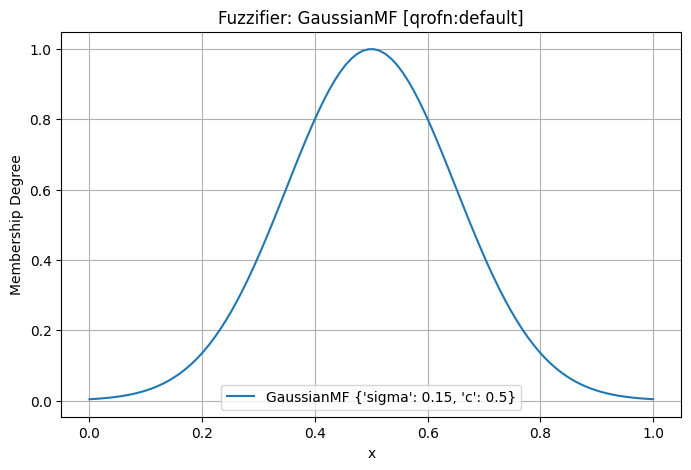

In [2]:
my_fuzzifier.plot()

In [3]:
# 3. 使用 layers 命名空间，像搭积木一样构建模型
model = Sequential([
    layers.normalization(method='min_max'),
    layers.fuzzification(fuzzifier=my_fuzzifier),
    # layers.statistics()
], name="DataAnalysisFlow")

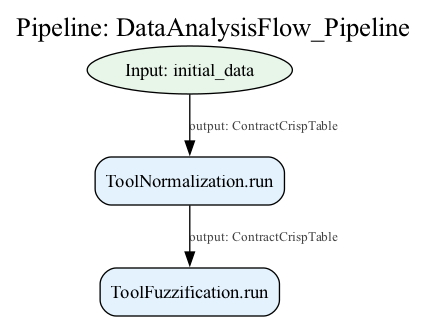

In [4]:
model.visualize()

In [5]:
raw_data = np.random.random((5,4))

In [6]:
data = pd.DataFrame(raw_data, columns=[f'Feature_{i}' for i in range(raw_data.shape[1])])

In [7]:
model.summary()

Model: "DataAnalysisFlow"
Layer (type)         Input Contract       Output Contract     
----------------------------------------------------------------------
ToolNormalization    CrispTable           CrispTable          
ToolFuzzification    CrispTable           FuzzyTable          
Total layers: 2


In [8]:
result = model.run(initial_data=data)

In [9]:
result

         Feature_0        Feature_1        Feature_2        Feature_3
0  <0.2042,0.5958>  <0.0039,0.7961>  <0.3354,0.4646>  <0.0039,0.7961>
1  <0.0171,0.7829>  <0.0039,0.7961>  <0.0039,0.7961>  <0.2446,0.5554>
2  <0.0039,0.7961>  <0.0039,0.7961>  <0.0328,0.7672>  <0.0112,0.7888>
3  <0.0039,0.7961>  <0.0039,0.7961>  <0.0931,0.7069>  <0.3565,0.4435>
4  <0.0072,0.7928>  <0.2212,0.5788>  <0.0039,0.7961>  <0.0039,0.7961>